https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

https://www.kaggle.com/datasets/uciml/mushroom-classification

In [41]:
import pandas as pd
import os

In [42]:
os.path.dirname(os.path.abspath('./'))

'/home/volodya/my_rep/course'

In [94]:
data = pd.read_csv('/home/volodya/my_rep/course/data/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Структура датафрейма:**<br>
1. gender $-$ пол (male, female)
2. race/ethnicity $-$ раса (group A, B, C, D, E) <br>
3. parental level of education $-$ уровень образования родителей (high school, some college ... ) <br>
4. lunch $-$ ланч (standard, free/reduced) <br>
5. test preparation course $-$ курс подготовки к тестированию (none, completed) <br>
6. math score  (0 - 100) <br>
7. reading score (0 - 100) <br>
8. writing score (0 - 100) <br>

# Часть 1

# Вывод общей информации по датафрейму

In [44]:
# data.head()
# data.tail()
# data.sample()

In [45]:
data.head(n=2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [46]:
data.tail(n=2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [47]:
data.sample(n=2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
222,female,group C,some high school,free/reduced,none,55,65,62
458,female,group E,bachelor's degree,standard,none,100,100,100


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- object
- int64
- float64
- datetime64
- bool

In [49]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [50]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [51]:
data.index

RangeIndex(start=0, stop=1000, step=1)

In [52]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

<br><br><br>

# Просмотр конкретных строк: iloc и loc

In [53]:
# Передаются числовые индексы колонок
data.iloc[[0,1,2], 0:2]

,gender,race/ethnicity
0,female,group B
1,female,group C
2,female,group B


In [54]:
# Передаются названия колонок
data.loc[[0,1,2], ['lunch', 'math score']]

,lunch,math score
0,standard,72
1,standard,69
2,standard,90


**Внимание!** <br>
df.loc[:6] затронет все индексы от начала до компонента 6, включая шестерку <br>
df.iloc[:6] затронет все индексы от начала и до компонента 6, не включая шестерку

In [55]:
# Все колонки
data.iloc[[0,1,2], :]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


<br><br><br>

# pd.Series и pd.DataFrame

In [56]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index = ['mouse', 'rabbit'],
                  columns = ['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [57]:
df.iloc[:, 0]

mouse     1
rabbit    4
Name: one, dtype: int64

In [58]:
type(df.iloc[:, 0]) # В пандовском датафрейме строки являются сериями с индексами,
# соответствующими индексам датафрейма

pandas.core.series.Series

In [59]:
df.iloc[0, :]

one      1
two      2
three    3
Name: mouse, dtype: int64

In [60]:
type(df.iloc[0, :]) # В пандовском датафрейме столбцы являются пандовскими сериями с индексами,
# соответствующими названиями колонок датафрейма

pandas.core.series.Series

In [61]:
pd.DataFrame({'col_name_1': [1,2,3], 'col_name_2': [5,6,7]})

,col_name_1,col_name_2
0,1,5
1,2,6
2,3,7


In [62]:
m_series_1 = pd.Series([1,2,3], index = ["Cercey", "Tywin", "Gregor"])
m_series_2 = pd.Series([4,5,6], index = ["Cercey", "Tywin", "Gregor"])
pd.DataFrame({'col_name_1': m_series_1, 'col_name_2': m_series_2})

,col_name_1,col_name_2
Cercey,1,4
Tywin,2,5
Gregor,3,6


In [63]:
df.one

mouse     1
rabbit    4
Name: one, dtype: int64

In [64]:
df['one']

mouse     1
rabbit    4
Name: one, dtype: int64

<br><br><br>

# Filter и SelectDtype

In [65]:
data.filter(like = 'score', axis = 1)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [66]:
data.select_dtypes(include='int64')

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [67]:
data.select_dtypes(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


<br><br><br>

# Условия на строки

In [68]:
# Внутрь датафрейма можно поместить какое-нибудь условие
data[data['gender'] == 'female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [69]:
data[(data['gender'] == 'female') & (data['lunch'] == 'standard')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
984,female,group C,some high school,standard,none,74,75,82
986,female,group C,associate's degree,standard,none,40,59,51
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95


# Удаление колонок с drop()

In [70]:
data.drop(['gender', 'lunch'], axis = 1)

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,none,72,72,74
1,group C,some college,completed,69,90,88
2,group B,master's degree,none,90,95,93
3,group A,associate's degree,none,47,57,44
4,group C,some college,none,76,78,75
...,...,...,...,...,...,...
995,group E,master's degree,completed,88,99,95
996,group C,high school,none,62,55,55
997,group C,high school,completed,59,71,65
998,group D,some college,completed,68,78,77


<br><br><br>

# Создание новых колонок

In [71]:
def squered_func(x):
    return x**2

squered_func(2)

4

In [72]:
squered_func = lambda x: x**2
squered_func(2)

4

In [73]:
data['score'] = data.apply(lambda row: (row['math score'] + row['reading score'] + row['writing score'])/3, axis = 1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [74]:
data['is_math_score_more_60'] = data.apply(lambda row: 1 if row['math score'] > 60 else 0, axis = 1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score,is_math_score_more_60
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,0
998,female,group D,some college,standard,completed,68,78,77,74.333333,1


Добавление колонки по сложному условию

In [75]:
def apply_conditions(row):
    if (row['math score'] < 40):
        return 0
    elif ((row['math score'] > 40) & (row['math score'] < 60)):
        return 1
    elif (row['math score'] > 60):
        return 2

In [76]:
data['group_on_math_score'] = data.apply(apply_conditions, axis = 1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score,is_math_score_more_60,group_on_math_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1,2.0
1,female,group C,some college,standard,completed,69,90,88,82.333333,1,2.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1,2.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0,1.0
4,male,group C,some college,standard,none,76,78,75,76.333333,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1,2.0
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1,2.0
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,0,1.0
998,female,group D,some college,standard,completed,68,78,77,74.333333,1,2.0


<br><br><br>

# Часть 2

# Визуализация с Seaborn

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

## Гистограмма

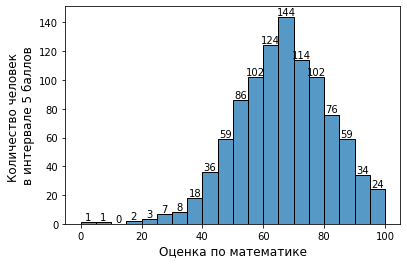

In [96]:
fig = plt.figure()

histogram = sns.histplot(data['math score'], binwidth = 5)

for i in histogram.containers:
    histogram.bar_label(i, size = 10)

histogram.set_xlabel("Оценка по математике", fontsize = 12)
histogram.set_ylabel("Количество человек \nв интервале 5 баллов", fontsize = 12)

plt.show()

fig.savefig('./Fig_1', dpi = 300, bbox_inches='tight')

## Боксплот

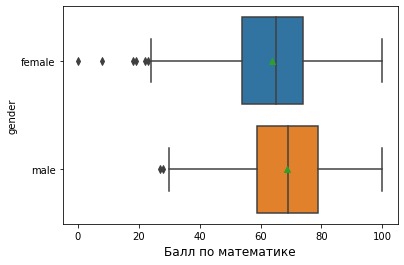

In [79]:
histogram = sns.boxplot(data=data, x='math score',y='gender', showmeans=True)
histogram.set_xlabel("Балл по математике", fontsize = 12)
plt.show()

## Виолинплот

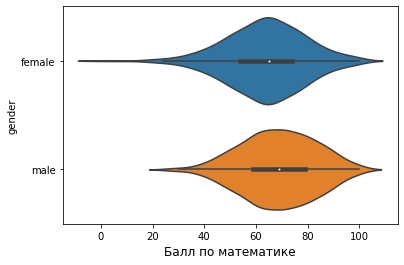

In [80]:
histogram = sns.violinplot(data=data, x='math score',y='gender', showmeans=True)
histogram.set_xlabel("Балл по математике", fontsize = 12)
plt.show()

## countplot и barplot

- countplot показывает количество записей на каждую категорию. 
- barplot показывает среднее (по умолчанию) значение признака по каждой категории.

<AxesSubplot:xlabel='math score', ylabel='gender'>

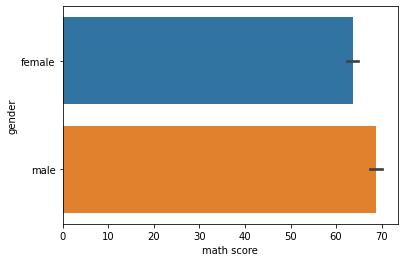

In [81]:
sns.barplot(data=data, x='math score', y='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

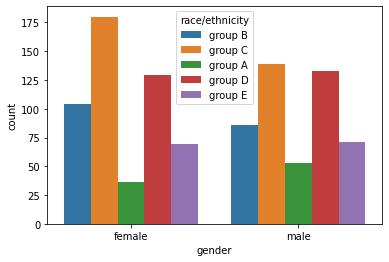

In [82]:
sns.countplot(data=data, x='gender', hue = 'race/ethnicity')

## pairplot

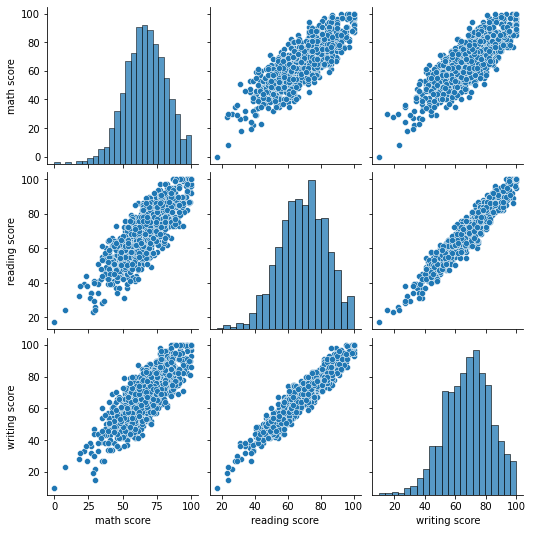

In [83]:
sns.pairplot(data = data[['math score', 'reading score', 'writing score']])

<br><br><br><br><br>

# Joins

In [84]:
import pandas as pd

In [85]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    """
    Функция взята из:
    https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
    """
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Информация о пользователях
dataframe_1 = pd.DataFrame({'user_id': [1,2,3,4,5], 'age': [25, 21, 42, 34, 18], 'city': ['Moscow', 'Spb', 'Voronezh', 'Kolomna', 'Kazan']})

# Информация о покупках, которые они совершают
dataframe_2 = pd.DataFrame({'user_id': [2, 5], 'date_of_puchase': ['2022-01-15', '2022-02-13']})
display_side_by_side(dataframe_1, dataframe_2, titles=['Users','Purchases']) #we left 3rd empty...

Users 
 
 
 
 user_id 
 age 
 city 
 
 
 
 
 0 
 1 
 25 
 Moscow 
 
 
 1 
 2 
 21 
 Spb 
 
 
 2 
 3 
 42 
 Voronezh 
 
 
 3 
 4 
 34 
 Kolomna 
 
 
 4 
 5 
 18 
 Kazan 
 
 
 Purchases 
 
 
 
 user_id 
 date_of_puchase 
 
 
 
 
 0 
 2 
 2022-01-15 
 
 
 1 
 5 
 2022-02-13

In [86]:
# Inner Join оставляет записи только по тем id, которые есть в обоих таблицах. 
pd.merge(dataframe_1, dataframe_2, on = 'user_id', how = 'inner')

,user_id,age,city,date_of_puchase
0,2,21,Spb,2022-01-15
1,5,18,Kazan,2022-02-13


In [87]:
# Inner Join то же самое, что и Inner Join + те записи из левой таблицы, для которых
# в правой таблице по условию on ничего не нашлось. Эти записи обозначены как NaN.
pd.merge(dataframe_1, dataframe_2, on = 'user_id', how = 'left')

,user_id,age,city,date_of_puchase
0,1,25,Moscow,NaN
1,2,21,Spb,2022-01-15
2,3,42,Voronezh,NaN
3,4,34,Kolomna,NaN
4,5,18,Kazan,2022-02-13


# Long data to short data

In [88]:
import pandas as pd

In [120]:
data_melt = pd.melt(frame=data, 
        # Тут перечисляем вообще все колонки
        id_vars=['gender', 'lunch'], 
        
        # Тут перечисляем колонки, которые нужно соединить
        value_vars=['math score', 'reading score', 'writing score'], 
        
        # Здесь название колонки со значениями
        value_name='score',
       
        # Название колонки, которая содержит инфу о предыдущих колонках
        var_name='math_read_write')

data_melt

,gender,lunch,math_read_write,score
0,female,standard,math score,72
1,female,standard,math score,69
2,female,standard,math score,90
3,male,free/reduced,math score,47
4,male,standard,math score,76
...,...,...,...,...
2995,female,standard,writing score,95
2996,male,free/reduced,writing score,55
2997,female,free/reduced,writing score,65
2998,female,standard,writing score,77


<AxesSubplot:xlabel='score', ylabel='math_read_write'>

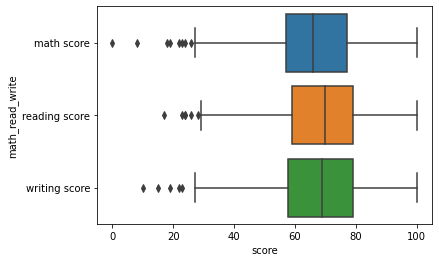

In [121]:
sns.boxplot(data = data_melt, x='score', y='math_read_write')

# Кодировка номинативных признаков

In [136]:
data['is_standart'] = data['lunch'].apply(lambda x: 1 if x == 'standard' else 0)

In [140]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [144]:
pd.get_dummies(data['parental level of education'])

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
995,0,0,0,1,0,0
996,0,0,1,0,0,0
997,0,0,1,0,0,0
998,0,0,0,0,1,0


In [142]:
pd.get_dummies(data['race/ethnicity'])

,group A,group B,group C,group D,group E
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
995,0,0,0,0,1
996,0,0,1,0,0
997,0,0,1,0,0
998,0,0,0,1,0


In [147]:
pd.concat([data, pd.get_dummies(data['race/ethnicity'])], axis=1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,is_standart,group A,group B,group C,group D,group E
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,1,0,0,0
1,female,group C,some college,standard,completed,69,90,88,1,0,0,1,0,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,1,0,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,0,0,0,0,1
996,male,group C,high school,free/reduced,none,62,55,55,0,0,0,1,0,0
997,female,group C,high school,free/reduced,completed,59,71,65,0,0,0,1,0,0
998,female,group D,some college,standard,completed,68,78,77,1,0,0,0,1,0
